<a href="https://colab.research.google.com/github/himanshuarora1703/codebasics-ML-exercise/blob/main/Logistic%20Regression/Logistic_regression_digit_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

In [2]:
data = load_digits()

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [12]:
data['target']

array([0, 1, 2, ..., 8, 9, 8])

In [23]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = pd.Series(data['target'],name='label')

In [24]:
# do the train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

X_train.shape

(1437, 64)

In [25]:
X_train

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1399,0.0,0.0,3.0,13.0,16.0,16.0,5.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,4.0,16.0,8.0,0.0,0.0,0.0
148,0.0,0.0,3.0,13.0,13.0,3.0,0.0,0.0,0.0,2.0,...,7.0,0.0,0.0,0.0,3.0,13.0,16.0,10.0,1.0,0.0
406,0.0,0.0,3.0,12.0,11.0,1.0,0.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,1.0,15.0,14.0,6.0,0.0,0.0
201,0.0,2.0,16.0,16.0,16.0,14.0,5.0,0.0,0.0,9.0,...,0.0,0.0,0.0,4.0,16.0,16.0,8.0,0.0,0.0,0.0
1014,0.0,0.0,8.0,12.0,5.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,0.0,0.0,14.0,16.0,16.0,16.0,14.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,0.0,0.0,0.0,9.0,13.0,0.0,6.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12.0,11.0,0.0,0.0,0.0
1498,0.0,1.0,9.0,15.0,13.0,4.0,0.0,0.0,0.0,5.0,...,7.0,0.0,0.0,0.0,8.0,15.0,16.0,9.0,1.0,0.0
90,0.0,0.0,0.0,1.0,12.0,8.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,13.0,4.0,0.0,0.0
572,0.0,0.0,10.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.0,4.0,0.0,0.0,7.0,16.0,16.0,16.0,16.0,11.0


In [26]:
# do scaling of data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga',max_iter=10000)

lr.fit(X_train,y_train)

y_pred_train = lr.predict(X_train) 
y_pred_test = lr.predict(X_test)

In [31]:
lr.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [33]:
lr.coef_.shape

(10, 64)

In [35]:
lr.intercept_

array([ 0.00287284, -0.06093565,  0.00429756,  0.00345812,  0.03350786,
       -0.0063945 , -0.00035172,  0.00766353,  0.03397018, -0.01808822])

In [37]:
# check for the accuracy
from sklearn.metrics import accuracy_score,classification_report,plot_confusion_matrix

print('The train accuracy is',accuracy_score(y_train,y_pred_train))
print('The test accuracy is',accuracy_score(y_test,y_pred_test))

The train accuracy is 1.0
The test accuracy is 0.9666666666666667


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


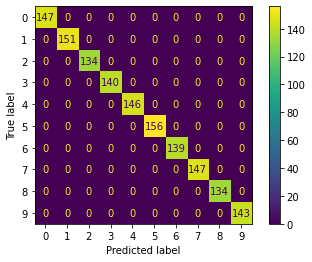

In [38]:
#plot the confusion matrix

plot_confusion_matrix(lr,X_train,y_train)

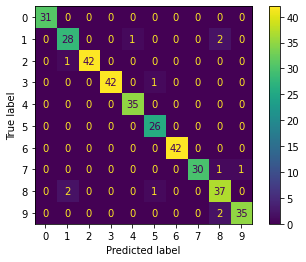

In [40]:
plot_confusion_matrix(lr,X_test,y_test)

In [41]:
# do pca on the data

from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [47]:
# train the model

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver='saga',max_iter=1000)

lr.fit(X_train_pca,y_train)

y_pred_train = lr.predict(X_train_pca) 
y_pred_test = lr.predict(X_test_pca)

In [48]:
print('The train accuracy is',accuracy_score(y_train,y_pred_train))
print('The test accuracy is',accuracy_score(y_test,y_pred_test))

The train accuracy is 1.0
The test accuracy is 0.95
